In [1]:
%pip install matplotlib
%pip install numpy
%pip install geopandas matplotlib
%pip install pandas
%pip install seaborn
import seaborn as sns
import geopandas as gpd
from scipy.stats import norm
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
percorso_csv = r"../csv_post_etl"

if os.path.exists(percorso_csv):
    for file in os.listdir(percorso_csv):
        percorso_csv_file = os.path.join(percorso_csv, file)
        print(f"Il file {percorso_csv_file} esiste.")
else:
    print(f"Il file {percorso_csv_file} non è stato trovato.")


df_appearances = pd.read_csv(percorso_csv + "/appearances_post.csv")
df_club_games = pd.read_csv(percorso_csv + "/club_games_post.csv")
df_clubs = pd.read_csv(percorso_csv + "/clubs_post.csv")
df_competitions = pd.read_csv(percorso_csv + "/competitions_post.csv")
df_game_events = pd.read_csv(percorso_csv + "/game_events_post.csv")
df_game_lineups = pd.read_csv(percorso_csv + "/game_lineups_post.csv")
df_games = pd.read_csv(percorso_csv + "/games_post.csv")
df_player_valuations = pd.read_csv(percorso_csv + "/player_valuations_post.csv")
df_players = pd.read_csv(percorso_csv + "/players_post.csv")

Il file ../csv_post_etl\appearances_post.csv esiste.
Il file ../csv_post_etl\clubs_post.csv esiste.
Il file ../csv_post_etl\club_games_post.csv esiste.
Il file ../csv_post_etl\competitions_post.csv esiste.
Il file ../csv_post_etl\games_post.csv esiste.
Il file ../csv_post_etl\game_events_post.csv esiste.
Il file ../csv_post_etl\game_lineups_post.csv esiste.
Il file ../csv_post_etl\players_post.csv esiste.
Il file ../csv_post_etl\player_valuations_post.csv esiste.


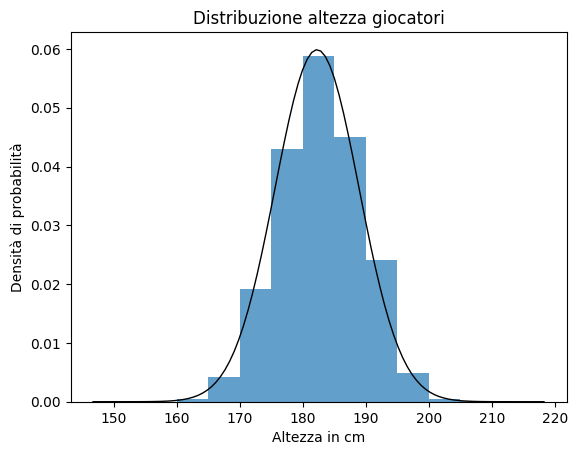

In [3]:
#tramite questo istogramma visualizziamo la distribuzione delle altezze dei giocatori
plt.figure()
plt.hist(df_players["height_in_cm"], bins=np.arange(150, 220, 5), alpha=0.7, density = True)

#Parametri della distribuzione normale
mu, std = norm.fit(df_players['height_in_cm'])

# Curva di approssimazione
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)


plt.xlabel("Altezza in cm")
plt.ylabel("Densità di probabilità")
plt.title("Distribuzione altezza giocatori")
plt.savefig("../images/distribuzione_altezza_giocatori_histo.png")

184.53346747149564
6.113883807463113
181.1559668025873
6.382767698371472


C:\Users\mikdr\AppData\Local\Temp\ipykernel_12216\4182924660.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=1, color ="blue")
C:\Users\mikdr\AppData\Local\Temp\ipykernel_12216\4182924660.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=1, color = "orange")


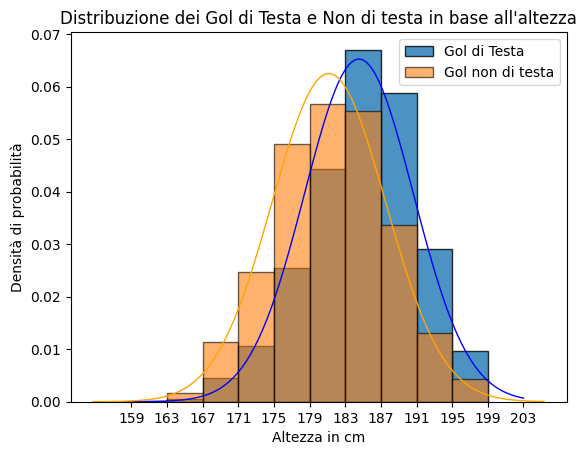

In [4]:
#df con i gol di testa
df_head_goal = pd.merge(df_players, df_game_events[df_game_events["description"].notna() & df_game_events['description'].str.contains('Header')], on ='player_id', how='inner')
df_head_goal = df_head_goal.loc[df_head_goal['description'].str.split().str[1].str.strip().str.contains("Header")]

#df con tutti i gol tranne quelli di testa
df_goal_no_testa = pd.merge(df_players, df_game_events[(df_game_events["type"].notna() & df_game_events['type'].str.contains('Goals') & ~df_game_events['description'].astype(str).str.contains('Header'))], on ='player_id', how='inner')

#df con i gol totali
goal_totali = df_appearances.groupby("player_id")["goals"].sum().reset_index(name = "gol_totali")
df_players = pd.merge(df_players, goal_totali, left_on="player_id", right_on="player_id", how="left")

#Calcola l'intervallo tra le colonne in base all'intervallo di altezza
num_bins = 12
height_min = 159
height_max = 203
bin_width = 4


#Crea l'array di bin con gli intervalli desiderati
bins = np.arange(height_min, height_max, bin_width)

#facciamo due istogrammi sovrapposti che rispettivamente rappresentano la distribuzione dei gol di testa in base alle altezze e dei gol non di
#testa sempre in base alle altezze
plt.figure() 
plt.hist(df_head_goal['height_in_cm'], bins=bins, edgecolor='black', alpha=0.8, label='Gol di Testa', width = bin_width, density = True)
plt.hist(df_goal_no_testa['height_in_cm'], bins=bins, edgecolor='black', alpha=0.6, label='Gol non di testa', width = bin_width, density = True)

# Aggiungi etichette, titolo e legenda
plt.xlabel('Altezza in cm')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzione dei Gol di Testa e Non di testa in base all\'altezza')
plt.xticks([159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199, 203])

mu1, std1 = norm.fit(df_head_goal['height_in_cm'])
# Curva di approssimazione
print(mu1)
print(std1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu1, std1)
plt.plot(x, p, 'k', linewidth=1, color ="blue")

mu2, std2 = norm.fit(df_goal_no_testa['height_in_cm'])
# Curva di approssimazione
print(mu2)
print(std2)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu2, std2)
plt.plot(x, p, 'k', linewidth=1, color = "orange")

plt.legend()
plt.savefig("../images/distribuzione_golTesta_golNoTesta.png")
plt.show()





In [5]:
#Leggi il GeoDataFrame del mondo tramite libreria GeoPandas, contenente dati geografici mondiali di livello basso. 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['name'] = world['name'].replace('United States of America', 'United States')

#Ottengo un df che combina i 2 in base al nome del paese e al paese di nascita dei giocatori
df_players_geo = world.merge(df_players, left_on='name', right_on='country_of_birth', how='left')

C:\Users\mikdr\AppData\Local\Temp\ipykernel_12216\1885926096.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


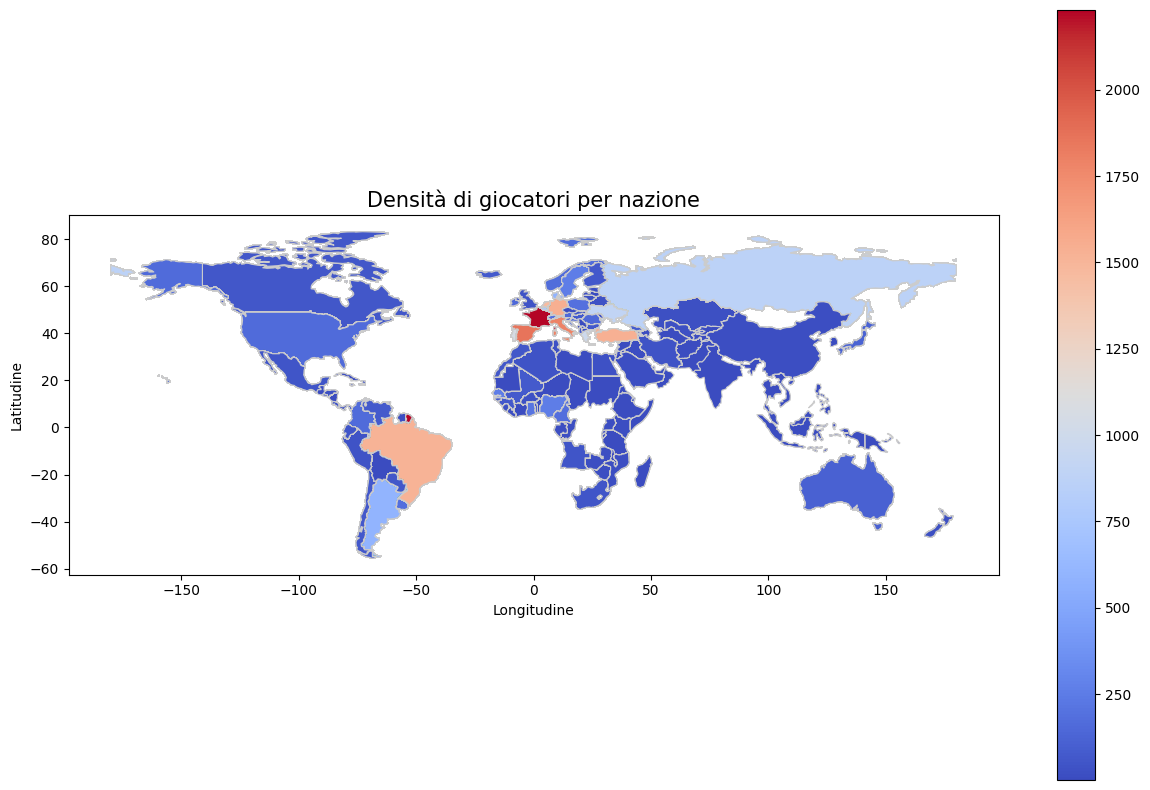

In [6]:
#Conta il numero di giocatori per paese di nascita
agg_data = df_players_geo['player_id'].groupby(df_players_geo['country_of_birth']).count().reset_index()
agg_data.columns = ['country_of_birth', 'num_players']

#Unisce l'aggregazione con il df
df_players_geo = pd.merge(df_players_geo, agg_data, on='country_of_birth', how='left')

# Disegna la mappa di calore
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#Usa il metodo plot di GeoDataFrame per visualizzare la mappa di calore
df_players_geo.plot(column='num_players', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

#Aggiunge titolo e etichette
ax.set_title('Densità di giocatori per nazione', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Mostra la legenda
leg = ax.get_legend()
if leg is not None:
    leg.set_bbox_to_anchor((1, 0.5))

# Mostra il grafico
plt.savefig("../images/giocatori_per_nazione_mappacalore.png")
plt.show()



In [7]:
#df per presenze per ogni giocatore (size() conta elementi non nulli per ciascun gruppo)
presenze_per_giocatore = df_appearances.groupby("player_id").size().reset_index(name="presenze")
#aggiorno il df_players con le presenze del giocatore
df_players = pd.merge(df_players, presenze_per_giocatore, left_on="player_id", right_on="player_id", how="left")

#df assist per ogni giocatore
assist_totali = df_appearances.groupby("player_id")["assists"].sum().reset_index(name = "assist_totali")
#aggiorno il df_players con gli assist totali del giocatore
df_players = pd.merge(df_players, assist_totali, left_on="player_id", right_on="player_id", how="left")

#df ammonizioni per ogni giocatore
ammonizioni_totali = df_appearances.groupby("player_id")["yellow_cards"].sum().reset_index(name = "ammonizioni_totali")
#aggiorno il df_players con le ammonizioni totali del giocatore
df_players = pd.merge(df_players, ammonizioni_totali, left_on="player_id", right_on="player_id", how="left")

#df espulsioni per ogni giocatore
espulsioni_totali = df_appearances.groupby("player_id")["red_cards"].sum().reset_index(name = "espulsioni_totali")
#aggiorno il df_players con le espulsioni totali del giocatore
df_players = pd.merge(df_players, espulsioni_totali, left_on="player_id", right_on="player_id", how="left")

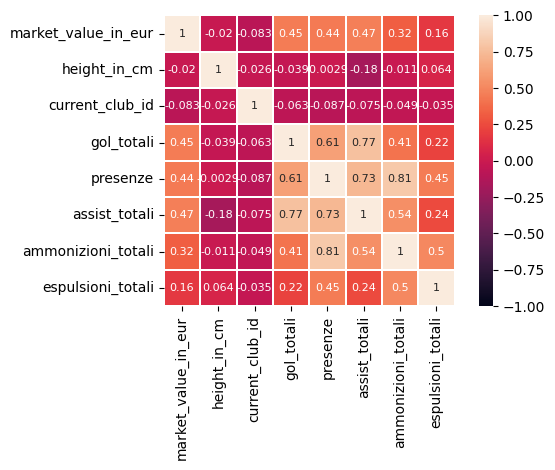

In [8]:
#df per preparare la correlazione, faccio merge tra df nelle parentesi solo di quelle colonne
correlazione = pd.merge(df_player_valuations[["market_value_in_eur", "player_id"]], df_players[["player_id", "height_in_cm", "current_club_id", "gol_totali", "presenze", "assist_totali", "ammonizioni_totali", "espulsioni_totali"]], how="inner", on="player_id")
#seleziono solo le colonne numeriche
numerical_columns = correlazione.select_dtypes(include=['float64', 'int64']).columns
#seleziono solo le colonne numeriche != da player id
numerical_columns = numerical_columns[numerical_columns != 'player_id']

corr = correlazione[numerical_columns].corr()

#formato del testo
annot_kws = {"size": 8}
#faccio heatmap
sns.heatmap(corr,vmax=1, vmin=-1,square=True, annot=True, linewidths=.2, cbar=True, annot_kws=annot_kws)
plt.tight_layout()
plt.savefig("../images/correlazione_player.png")
plt.show()



C:\Users\mikdr\AppData\Local\Temp\ipykernel_12216\2167709257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro["goals"] = 1
C:\Users\mikdr\AppData\Local\Temp\ipykernel_12216\2167709257.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro["date"] = pd.to_datetime(df_filtro["date"], errors='coerce')
C:\Users\mikdr\AppData\Local\Temp\ipykernel_12216\2167709257.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

<Figure size 1000x600 with 0 Axes>

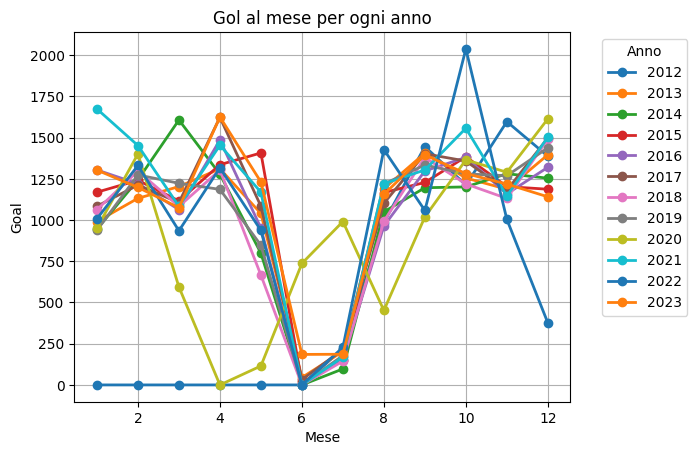

In [9]:
#nel dataset manca sicuro il giugno 2022, e fino a giugno del 2012 (kaggle)
#creo df con il tipo di evento = a gol
df_filtro = df_game_events.loc[(df_game_events["type"] == "Goals")]
#creo la colonna gol con tutti 1 tanto ogni evento corrisponde ad un solo gol
df_filtro["goals"] = 1

# Converti la colonna "date" in un oggetto datetime, gestendo gli errori
df_filtro["date"] = pd.to_datetime(df_filtro["date"], errors='coerce')

# Estrai l'anno dalla colonna di data
df_filtro["year"] = df_filtro["date"].dt.year
df_filtro["month"] = df_filtro["date"].dt.month

#calcolo i gol mensili per ogni anno
monthly_goals = df_filtro.groupby(["month", "year"])["goals"].sum().reset_index()

#creo tabella pivot con righe (index) colonne (columns) e valori (values), dove ho NaN metto 0
pivot_table = monthly_goals.pivot(index='month', columns='year', values='goals').fillna(0)

# Crea un grafico a linee con una linea per ogni anno
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='line', marker='o', linestyle='-', linewidth=2)
plt.title('Gol al mese per ogni anno')
plt.xlabel('Mese')
plt.ylabel('Goal')
plt.legend(title='Anno', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig("../images/gol_mensili_per_anno.png")
plt.show()


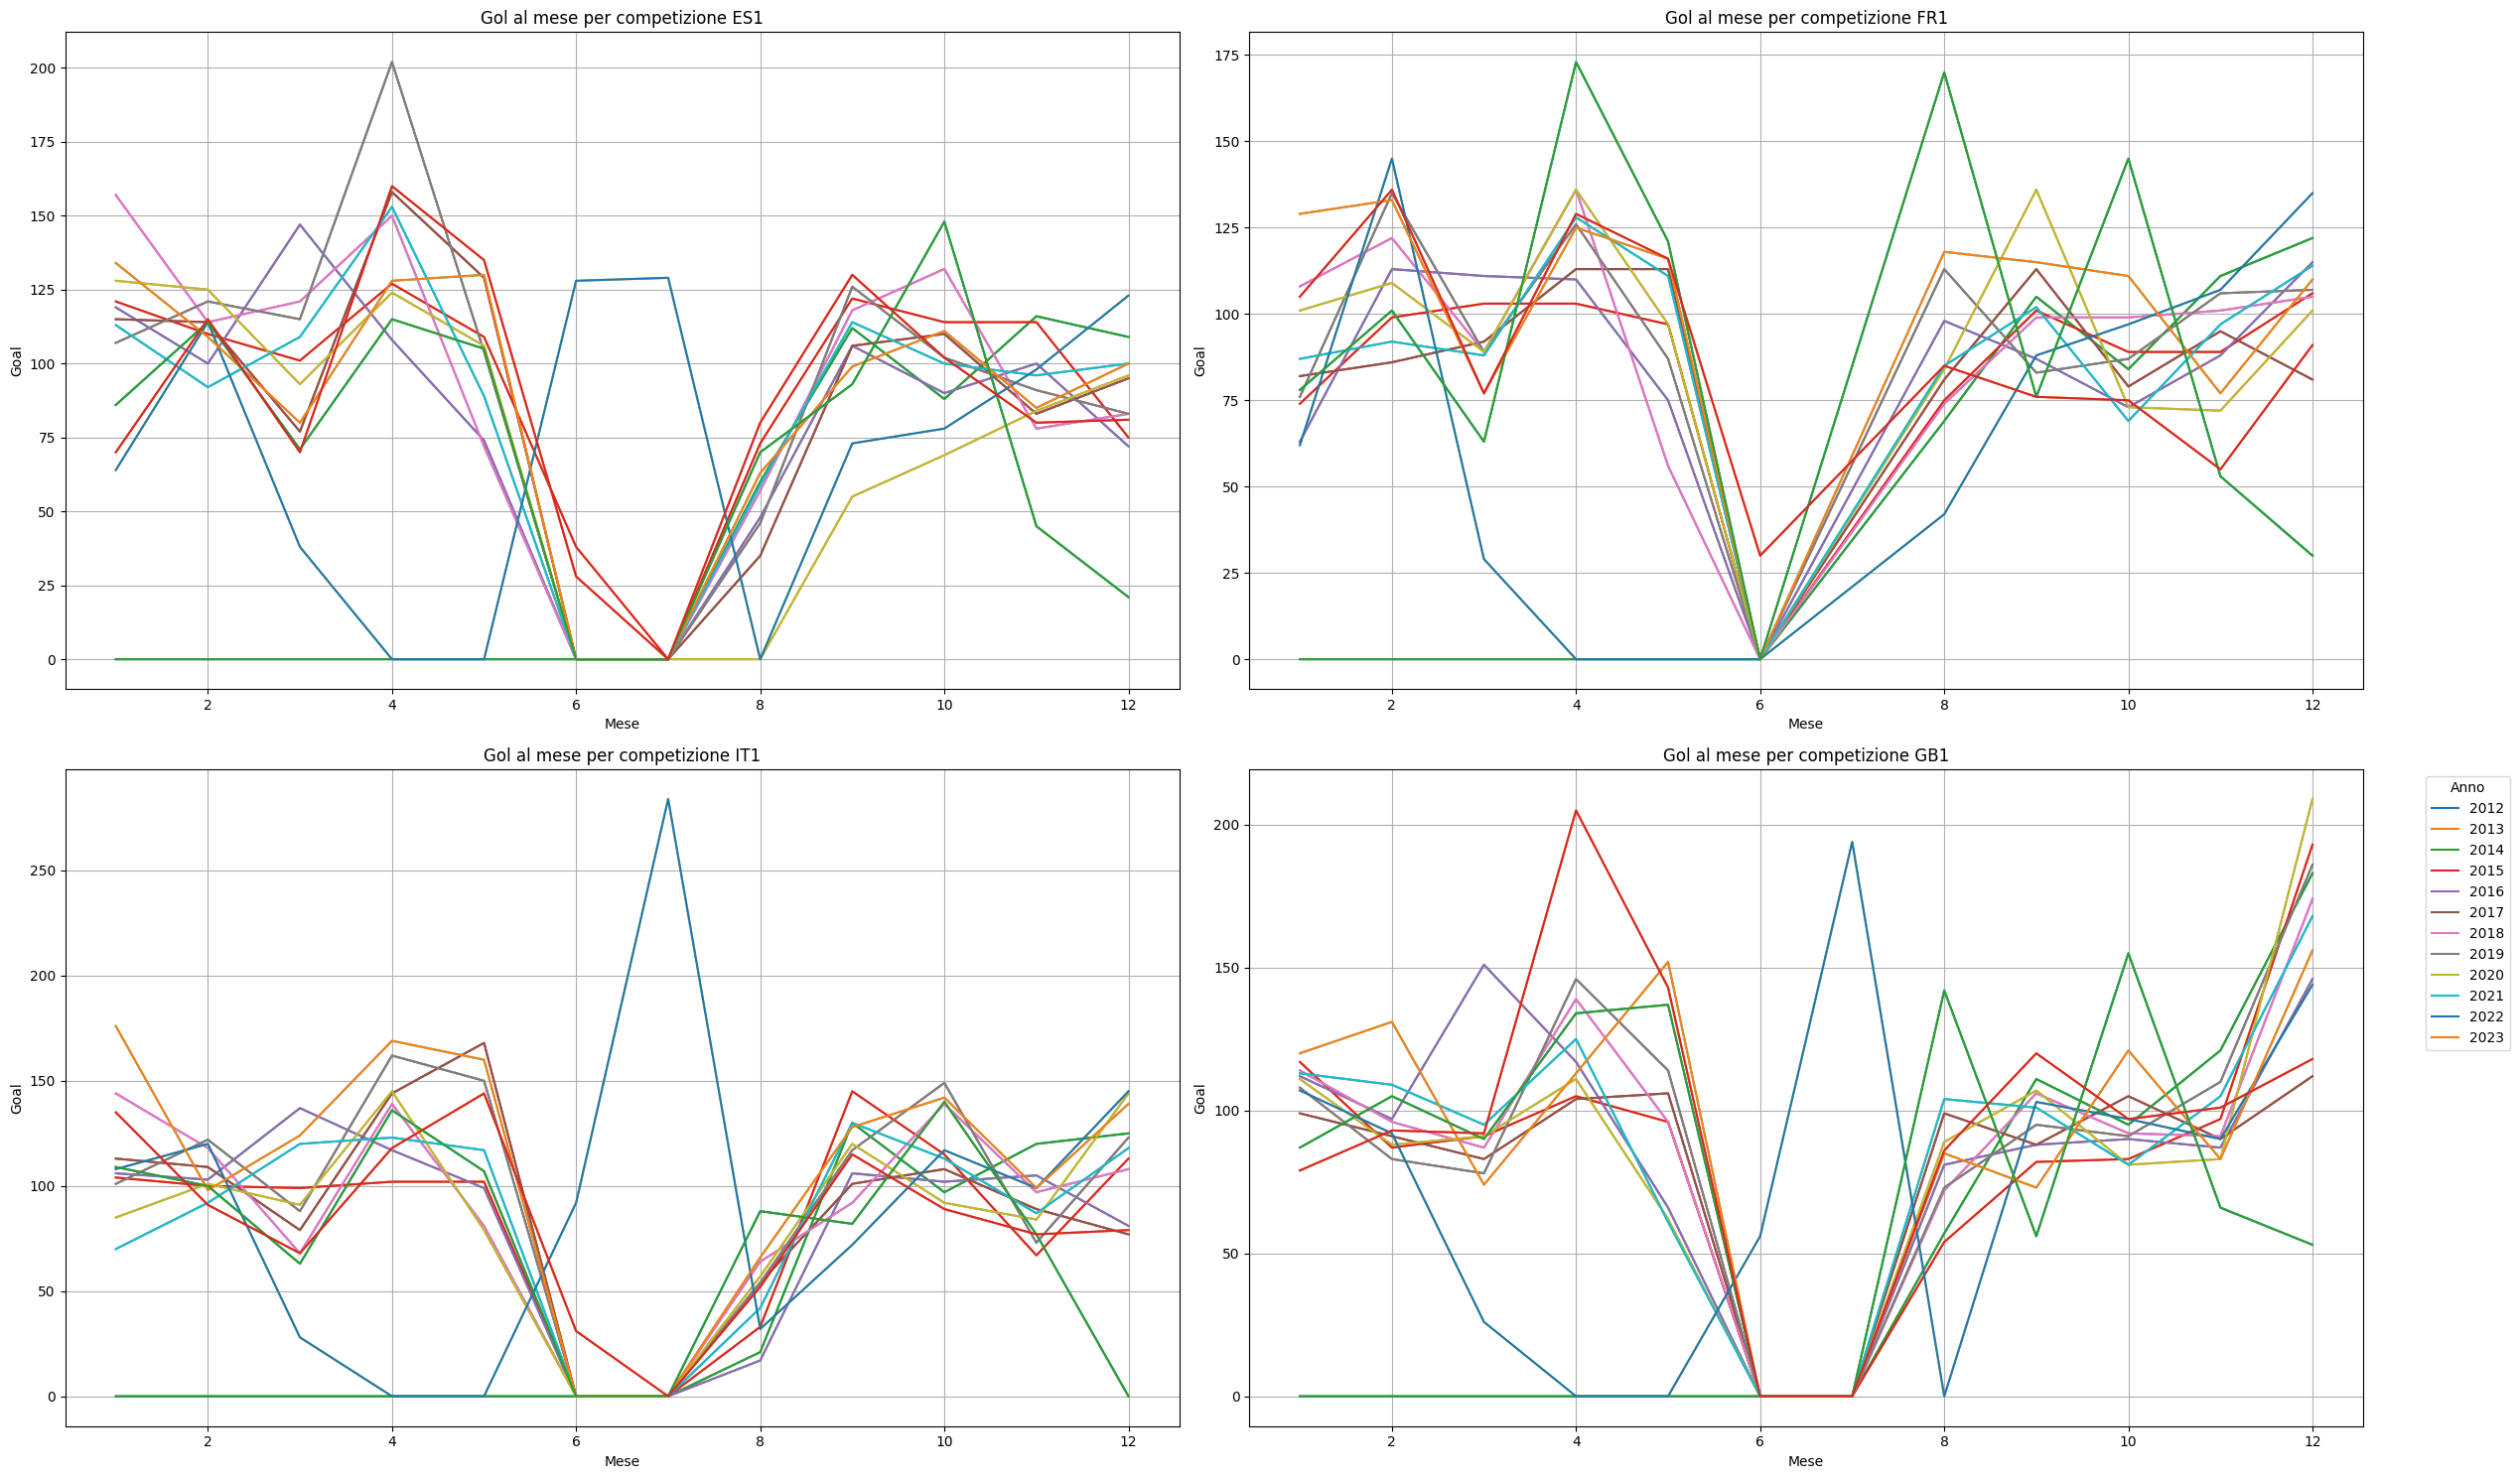

In [10]:
#creo df che abbia mergiato tra filtro (quello di sopra) e games (solo le due colonne tra parentesi)
df_ge_g = pd.merge(df_filtro, df_games[["game_id", "competition_id"]], on = "game_id", how = "inner")

#creo df per mettere in ge_g anche la competizione
df_gol_competizioni = pd.merge(df_competitions.where(df_competitions["sub_type"] == "first_tier"), df_ge_g, on = "competition_id", how = "inner")
#creo df con i gol per competizione per ogni mese di ogni anno
df_gol_competizioni = df_gol_competizioni.groupby(["competition_id","month", "year"])["goals"].sum().reset_index()

# Crea una singola figura fuori dal loop
plt.figure(figsize=(24, 15))
i = 0
#prendo solo i 4 principali campionati (sub types = first_tier) quindi gran bretagna, spagna, italia e francia
for index, row in df_competitions.iterrows():
    if (row["sub_type"] == "first_tier") & (row["competition_id"] in ["GB1", "IT1", "ES1", "FR1"]):
        i = i + 1
        competition_id = row["competition_id"]

        # Filtra il DataFrame solo per la competizione corrente
        df_competition = df_ge_g[df_ge_g["competition_id"] == competition_id]

        # Calcola i gol mensili per ogni anno
        monthly_goals = df_competition.groupby(["month", "year"])["goals"].sum().reset_index()

        # Crea una pivot table per i gol mensili
        pivot_table = monthly_goals.pivot(index='month', columns='year', values='goals').fillna(0)

        plt.subplot(2, 2, i)
        for column in pivot_table.columns:
            plt.plot(pivot_table.index, pivot_table[column], label=column)

        plt.plot(pivot_table)
        
        # Aggiungi etichette e titolo
        plt.title(f'Gol al mese per competizione {competition_id}')
        plt.xlabel('Mese')
        plt.ylabel('Goal')
        
        plt.grid(True)

#Regolo layout per evitare sovrapposizioni
plt.tight_layout()
plt.legend(title='Anno', bbox_to_anchor=(1.05, 1), loc='upper left')

#Salvo grafico come immagine e visualizzo
plt.savefig("../images/gol_mensili_per_competizione.png")
plt.show()